In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Process district names from https://www.doogal.co.uk/london_postcodes

In [2]:
# Unique name correspondance
dn = """E1: Mile End, Stepney, Whitechapel
E2: Bethnal Green, Shoreditch
E3: Bow, Bromley-by-Bow
E4: Chingford, Highams Park
E5: Clapton
E6: East Ham, Beckton
E7: Forest Gate, Upton Park
E8: Hackney, Dalston
E9: Hackney, Homerton
E10: Leyton
E11: Leytonstone
E12: Manor Park
E13: Plaistow
E14: Isle of Dogs, Millwall, Poplar
E15: Stratford, West Ham
E16: Canning Town, North Woolwich
E17: Walthamstow
E18: South Woodford
E20: Olympic Park, Stratford
N1: Barnsbury, Canonbury, Islington
N2: East Finchley
N3: Finchley Central
N4: Finsbury Park, Manor House
N5: Highbury
N6: Highgate
N7: Holloway
N8: Crouch End, Hornsey
N9: Lower Edmonton
N10: Muswell Hill
N11: Friern Barnet, New Southgate
N12: North Finchley, Woodside Park
N13: Palmers Green
N14: Southgate
N15: Seven Sisters
N16: Stamford Hill, Stoke Newington
N17: Tottenham
N18: Upper Edmonton
N19: Archway, Tufnell Park
N20: Totteridge, Whetstone
N21: Winchmore Hill
N22: Alexandra Palace, Wood Green
NW1: Camden Town, Regent's Park
NW2: Cricklewood, Neasden
NW3: Hampstead, Swiss Cottage
NW4: Brent Cross, Hendon
NW5: Kentish Town
NW6: Kilburn, Queens Park, West Hampstead
NW7: Mill Hill
NW8: St John's Wood
NW9: Colindale, Kingsbury
NW10: Harlesden, Kensal Green, Willesden
NW11: Golders Green, Hampstead Garden Suburb
SE1: Bermondsey, Borough, Southwark, Waterloo
SE2: Abbey Wood
SE3: Blackheath, Westcombe Park
SE4: Brockley, Crofton Park, Honor Oak Park
SE5: Camberwell
SE6: Bellingham, Catford, Hither Green
SE7: Charlton
SE8: Deptford
SE9: Eltham, Mottingham
SE10: Greenwich
SE11: Lambeth
SE12: Grove Park, Lee
SE13: Hither Green, Lewisham
SE14: New Cross, New Cross Gate
SE15: Nunhead, Peckham
SE16: Rotherhithe, South Bermondsey, Surrey Docks
SE17: Elephant & Castle, Walworth
SE18: Plumstead, Woolwich
SE19: Crystal Palace, Upper Norwood
SE20: Anerley, Penge
SE21: Dulwich
SE22: East Dulwich
SE23: Forest Hill
SE24: Herne Hill
SE25: South Norwood
SE26: Sydenham
SE27: Tulse Hill, West Norwood
SE28: Thamesmead
SW1: Belgravia, Pimlico, Westminster
SW2: Brixton, Streatham Hill
SW3: Brompton, Chelsea
SW4: Clapham
SW5: Earl's Court
SW6: Fulham, Parson's Green
SW7: South Kensington
SW8: Nine Elms, South Lambeth
SW9: Brixton, Stockwell
SW10: West Brompton, World's End
SW11: Battersea, Clapham Junction
SW12: Balham
SW13: Barnes, Castelnau
SW14: East Sheen, Mortlake
SW15: Putney, Roehampton
SW16: Norbury, Streatham
SW17: Tooting
SW18: Earlsfield, Wandsworth
SW19: Merton, Wimbledon
SW20: Raynes Park, South Wimbledon
W1: Marylebone, Mayfair, Soho
W2: Bayswater, Paddington
W3: Acton
W4: Chiswick
W5: Ealing
W6: Hammersmith
W7: Hanwell
W8: Kensington
W9: Maida Vale, Warwick Avenue
W10: Ladbroke Grove, North Kensington
W11: Holland Park, Notting Hill
W12: Shepherd's Bush
W13: West Ealing
W14: West Kensington"""
district_name_references = {}
for name in dn.split('\n'):
    key, value = name.split(':')
    district_name_references[key.strip()] = f'{value.strip()} ({key.strip()})'
# Multiple district codes, single name reference
for name_correspondances in (('EC1A  EC1M  EC1N  EC1P  EC1R  EC1V  EC1Y','Barbican, Clerkenwell, Finsbury'),
                             ('EC2A  EC2M  EC2N  EC2P  EC2R  EC2V  EC2Y','Moorgate, Liverpool Street'),
                             ('EC3A  EC3M  EC3N  EC3P  EC3R  EC3V','Aldgate, Monument, Tower Hill'),
                             ('EC4A  EC4M  EC4N  EC4P  EC4R  EC4V  EC4Y',"Fleet Street, St Paul's"),
                            ('WC1A  WC1B  WC1E  WC1H  WC1N  WC1R  WC1V  WC1X',"Bloomsbury, Gray's Inn"),
                            ('WC2A  WC2B  WC2E  WC2H  WC2N  WC2R','Covent Garden, Holborn, Strand')):
    for district in name_correspondances[0].split(' '):
        if district != '':
            district_name_references[district] = f'{name_correspondances[1]} ({district})'
district_name_references['E1W'] = district_name_references['E1']
district_name_references['N1C'] = district_name_references['N1']
district_name_references['N1P'] = district_name_references['N1']
for l in ['A', 'E', 'H', 'P', 'V', 'W', 'X', 'Y']:
    district_name_references[f'SW1{l}'] = district_name_references['SW1']
for l in ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'S', 'T', 'U', 'W']:
    district_name_references[f'W1{l}'] = district_name_references['W1']

In [3]:
# Save district name references for further usage
json_district_name_references = json.dumps(district_name_references)
with open("data/district_name_references.json", "w") as outfile:
    outfile.write(json_object)

## Create district names

In [8]:
district_names = [f'EC{i}{l}' for i in range(1,5) for l in ('A','M','N','P','R','V')]\
    + [f'W1{l}' for l in ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'S', 'T', 'U', 'W']]\
    + [f'W{i}' for i in range(2,15)]\
    + ['E1W','N1C', 'N1P']\
    + [f'SW1{l}' for l in ['A', 'E', 'H', 'P', 'V', 'W', 'X', 'Y']]\
    + [f'SW{i}' for i in range(2,21)]\
    + [f'EC{i}Y' for i in (1,2,4)]\
    + [f'WC{i}{l}' for i in (1,2) for l in ('A','B','E','H','N','R')]\
    + [f'{l}{i}' for m,l in [(19,'E'),(23,'N'),(12,'NW'),(29,'SE')] for i in range(1,m)]\
    + ['WC1V','WC1X','E20']

In [9]:
json_district_names = json.dumps(district_names)
with open("data/district_names.json", "w") as outfile:
    outfile.write(json_district_names)

## Create weighted scores 

I use expenontial decay to weight historical rating (https://en.wikipedia.org/wiki/Exponential_decay). I do it in the following way:
1) Use periods from one inspection date to the next one. For each inspection, I count its age in years from today. For each row in the data, $t_{1}$ will be the following inspection age and $t_{0}$ is the current inspection date. For the last inspection, I take current date as the following inspection date.
2) Assign the following initial weight to each period: $\int_{t_0}^{t_1}\exp(-\lambda t)dt=\frac{1}{\lambda}(\exp(-\lambda t_0)-\exp(-\lambda t_1))$.
3) Normalize weights to sum up to 1 for each school.
4) Multiple weight by the inspection score and sum them for each school.

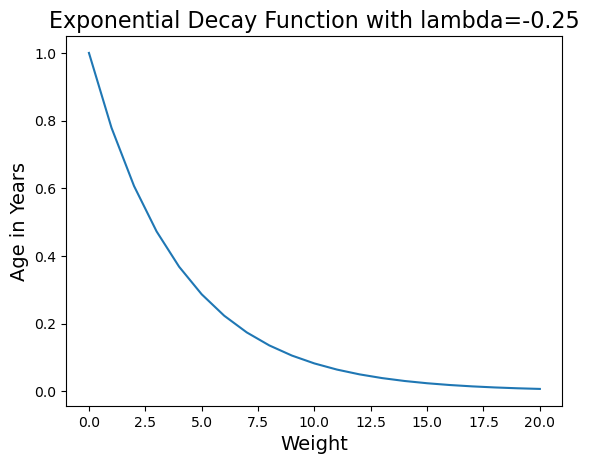

In [4]:
lambda_ = -0.25
x = np.arange(21)
y = np.exp(lambda_*x)
plt.plot(x,y)
plt.title(f'Exponential Decay Function with lambda={lambda_}',fontsize=16)
plt.ylabel('Age in Years',fontsize=14)
plt.xlabel('Weight',fontsize=14)
plt.show()

I use $\lambda$=-0.25 because it does not decay too fast and not too slow. Two years in the past will have 60% weight compared to today and 5 years in the past will have ~30% weight compared to today.

In [5]:
inspection_data = pd.read_csv('data/inspection_data.csv', parse_dates=['record_date','publication_date'])
scores_regexp = '|'.join(['Outstanding','Good','Requires Improvement','Inadequate'])
# Remove unrated inspections/visits
rated_inspections = inspection_data[
    (inspection_data['record_details'].str.contains('inspection',case=False)) &
    (inspection_data['record_details'].str.lower().str.contains(scores_regexp,case=False))].copy()
rated_inspections['rating'] = rated_inspections['record_details'].str.split(':').str[-1].str.strip()
rating_mapping = {'Outstanding':4, 'Good':3, 'Requires Improvement':2, 'Inadequate':1}
rated_inspections['numerical_rating'] = rated_inspections['rating'].map(rating_mapping)

In [6]:
TODAY = pd.Timestamp.today().replace(hour=0, minute=0, second=0, microsecond=0)
YEAR = np.timedelta64(1, 'Y')
LAMBDA = -0.25
rated_inspections['next_record_date'] = rated_inspections[['school_id','record_date']].groupby(['school_id']).shift(1)
# Fill the next recod daye of the last inspection with today
rated_inspections.loc[rated_inspections['next_record_date'].isna(), 'next_record_date'] = TODAY
rated_inspections['record_age'] = (TODAY - rated_inspections['record_date']) / YEAR
rated_inspections['next_record_age'] = (TODAY - rated_inspections['next_record_date']) / YEAR
rated_inspections['weight'] = 1/LAMBDA * (np.exp(LAMBDA*rated_inspections['record_age'])-np.exp(LAMBDA*rated_inspections['next_record_age']))
# Normalize weights
rated_inspections['weight'] = rated_inspections['weight'] / rated_inspections[['school_id','weight']].groupby(['school_id']).transform(sum)['weight']
rated_inspections['weighted_score'] = rated_inspections['weight'] * rated_inspections['numerical_rating']
weighted_scores = rated_inspections[['school_id','weighted_score']].groupby(['school_id'],as_index=False).sum()
weighted_scores.to_csv('data/weighted_scores.csv',index=False)